In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
basket_df=pd.read_csv("basket_details.csv")

In [4]:
basket_df.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [5]:
customer_df=pd.read_csv("customer_details.csv")

In [7]:
customer_df.head()

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [41]:
basket_df[basket_df["customer_id"]==20056678]

,customer_id,product_id,basket_date,basket_count
4,20056678,44747002,2019-06-19,2


In [42]:
customer_df[customer_df["customer_id"]==20056678]

,customer_id,sex,customer_age,tenure


In [13]:
#demek ki bunlar iki ayrı veri

In [20]:
#kimin sepetinde hangi üründen en fazla var

In [21]:
largest_basket_df=basket_df.nlargest(10,"basket_count")

In [22]:
largest_basket_df

,customer_id,product_id,basket_date,basket_count
1849,29582629,4079048,2019-06-10,10
9023,22988999,4973112,2019-05-26,10
4920,34878264,47882541,2019-06-03,9
9291,41064457,45912125,2019-05-22,9
932,22410597,48002535,2019-06-15,8
1765,11732494,33058643,2019-06-12,8
5264,15277082,43277408,2019-06-07,8
5735,35641465,39424211,2019-05-28,8
11344,29142937,32872142,2019-06-19,8
11480,7851168,3675590,2019-06-16,8


In [19]:
basket_df[basket_df["product_id"]==4079048]

,customer_id,product_id,basket_date,basket_count
1849,29582629,4079048,2019-06-10,10
7134,25433532,4079048,2019-06-16,2


In [23]:
#popüler ürünlere bakalım

In [33]:
populer_urun_df=basket_df["product_id"].value_counts().head(10)

In [36]:
populer_urun_df

product_id
43524799    32
31516269    25
39833031    24
46130148    17
40276011    12
3735903     12
42033035    11
39050110    11
34913531    10
35134963    10
Name: count, dtype: int64

In [27]:
#bunlar en çok satılan 10 ürün

In [37]:
basket_df

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2
...,...,...,...,...
14995,8336862,50977318,2019-05-26,2
14996,9500785,43862061,2019-05-26,2
14997,22787344,6041664,2019-05-26,2
14998,8221263,3597369,2019-05-26,2


In [43]:
#aylara göre en çok hangi ürün alınmış

In [47]:
basket_df["basket_date"]= pd.to_datetime(basket_df["basket_date"])

In [48]:
basket_df["basket_date"]

0       2019-06-19
1       2019-06-19
2       2019-06-19
3       2019-06-19
4       2019-06-19
           ...    
14995   2019-05-26
14996   2019-05-26
14997   2019-05-26
14998   2019-05-26
14999   2019-05-26
Name: basket_date, Length: 15000, dtype: datetime64[ns]

In [50]:
basket_df["ay"] = basket_df["basket_date"].dt.month

In [51]:
basket_df

,customer_id,product_id,basket_date,basket_count,ay
0,42366585,41475073,2019-06-19,2,6
1,35956841,43279538,2019-06-19,2,6
2,26139578,31715598,2019-06-19,3,6
3,3262253,47880260,2019-06-19,2,6
4,20056678,44747002,2019-06-19,2,6
...,...,...,...,...,...
14995,8336862,50977318,2019-05-26,2,5
14996,9500785,43862061,2019-05-26,2,5
14997,22787344,6041664,2019-05-26,2,5
14998,8221263,3597369,2019-05-26,2,5


In [53]:
ay_urun_satis = basket_df.groupby(["ay", "product_id"]).size().reset_index(name="adet")


In [54]:
ay_urun_satis

,ay,product_id,adet
0,5,49390,1
1,5,52798,1
2,5,53093,1
3,5,53238,2
4,5,64894,1
...,...,...,...
13641,6,55445659,1
13642,6,55464635,1
13643,6,55521098,1
13644,6,55578837,1


In [61]:
#ay_urun_satis hangi ürünün hangi ay kaç tane sattığını verir

In [55]:
en_cok_satan = ay_urun_satis.loc[
    ay_urun_satis.groupby("ay")["adet"].idxmax()
]


In [56]:
en_cok_satan

,ay,product_id,adet
5779,5,43524799,21
9295,6,31516269,13


<Axes: xlabel='product_id'>

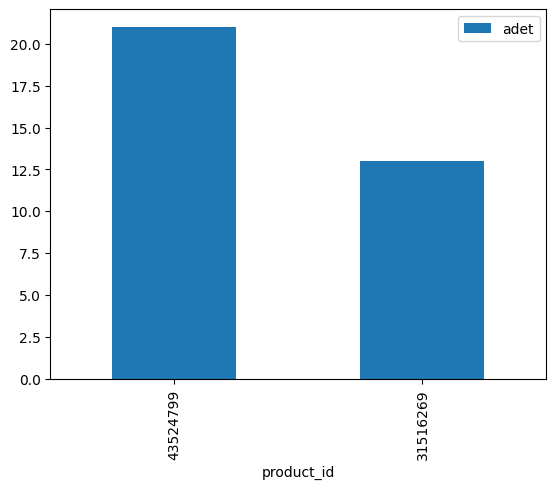

In [77]:
en_cok_satan.plot(x="product_id",y="adet",kind="bar")

In [58]:
top3 = (ay_urun_satis
        .sort_values(["ay", "adet"], ascending=[True, False])
        .groupby("ay")
        .head(3))


In [59]:
top3

,ay,product_id,adet
5779,5,43524799,21
4787,5,39833031,17
6382,5,46130148,14
9295,6,31516269,13
11654,6,43524799,11
11036,6,39833031,7


<Axes: xlabel='product_id'>

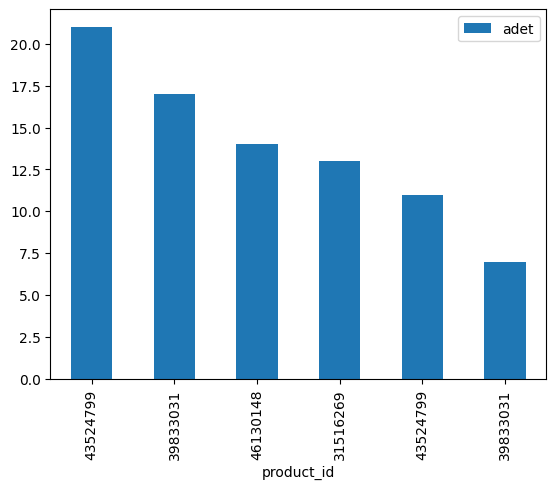

In [78]:
top3.plot(x="product_id",y="adet",kind="bar")

In [60]:
#bunlar aylara göre en çok satılan 3 ürün

In [62]:
#biraz da diğer veri setimizi inceleyelim

In [65]:
customer_df.head()

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [66]:
#hep male gözüküyor female yok mu bakalım

In [67]:
customer_df[customer_df["sex"]=="Female"]

,customer_id,sex,customer_age,tenure
16,831271,Female,38.0,129
18,11350661,Female,24.0,66
23,11328737,Female,41.0,66
28,12417929,Female,35.0,54
32,10189011,Female,39.0,86
...,...,...,...,...
19973,12623079,Female,49.0,52
19977,12606531,Female,36.0,52
19986,12560981,Female,46.0,52
19987,12525219,Female,40.0,52


In [68]:
#varmıs:)

In [69]:
customer_df

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


In [70]:
#kaç erkek kaç kadın var bakalım

In [84]:
gender_counts=customer_df["sex"].value_counts()

In [85]:
gender_counts

sex
Male                15322
Female               4669
kvkktalepsilindi        8
UNKNOWN                 1
Name: count, dtype: int64

In [86]:
gender_df= gender_counts.reset_index()

In [87]:
gender_df.columns = ["cinsiyet", "adet"]

In [88]:
gender_df

,cinsiyet,adet
0,Male,15322
1,Female,4669
2,kvkktalepsilindi,8
3,UNKNOWN,1


<Axes: xlabel='cinsiyet'>

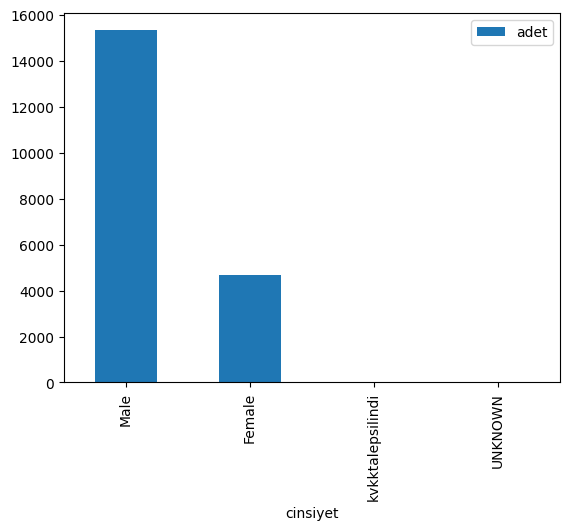

In [89]:
gender_df.plot(x="cinsiyet",y="adet",kind="bar")